In [ ]:
problems:
1-mixed format
2-batchNorm,loss
3-No.steps

# Import Library

In [174]:
#import cv2,os
import random
from tensorflow.keras.optimizers import Adam 
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
import keras
import matplotlib.image as mpimg
from matplotlib import image
from keras.callbacks import ReduceLROnPlateau
from tensorflow.keras import layers
#import plotly.graph_objects as go
from tensorflow.keras.applications import MobileNetV2
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.models import Model
from keras.applications.vgg16 import VGG16 
from keras.applications.vgg19 import VGG19  
from tensorflow.keras.applications import mobilenet_v2
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score,f1_score, confusion_matrix
from keras.layers import Conv2D, Dense, MaxPooling2D, Activation, Dropout, Flatten,InputLayer
from tensorflow .keras.preprocessing.image import img_to_array,load_img
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from keras.applications.inception_v3 import InceptionV3
from sklearn.metrics import accuracy_score

SyntaxError: invalid syntax (<ipython-input-174-3874dab92a65>, line 2)

In [ ]:
random_state=42

# Read the dataset & Spilt to (Train.Validation,Test)

In [113]:
## Defining batch specfications
batch_size = 100
img_height = 250
img_width = 250

In [3]:
# path = './DeepLearning Project/data/train'
# path

In [129]:
## loading training set
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    './data/train',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size)

Found 791 files belonging to 2 classes.


In [ ]:
## Generated Validation Augmen
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator =  val_datagen.flow_from_directory(
    './data/train',
    seed=42,
    target_size= (img_height, img_width),
    batch_size=batch_size, class_mode='binary')

In [161]:
x_train, y_train= train_generator

ValueError: too many values to unpack (expected 2)

In [132]:
## loading validation dataset
validation_ds =  tf.keras.preprocessing.image_dataset_from_directory(
    './data/val',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size)

Found 98 files belonging to 2 classes.


In [ ]:
## Generated Validation Augmen
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator =  val_datagen.flow_from_directory(
    './data/val',
    seed=42,
    target_size= (img_height, img_width),
    batch_size=batch_size, class_mode='binary')

In [134]:
testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
    './data/test',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size)

class_names= training_ds.class_names

# ## Configuring dataset for performance
# AUTOTUNE = tf.data.experimental.AUTOTUNE
# training_ds = training_ds.cache().prefetch(buffer_size=AUTOTUNE)
# testing_ds = testing_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 100 files belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    './data/test',
    seed=42,
    target_size= (img_height, img_width),
    batch_size=batch_size, class_mode='binary')

In [135]:
for x_test, y_test in testing_ds:
    print('Test data batch shape:', x_test.shape)
    print('Test labels batch shape:', y_test.shape)
    break

Test data batch shape: (100, 250, 250, 3)
Test labels batch shape: (100,)


In [ ]:
# Create the data sets
train_images, train_labels = next(train_generator)
val_images, val_labels = next(val_generator)
test_images, test_labels = next(test_generator)

In [ ]:
# Checking the shapes of the datasets
m_train = train_images.shape[0]
num_px = train_images.shape[1]
m_val = val_images.shape[0]
m_test = test_images.shape[0]

print ("Number of training samples: " + str(m_train))
print ("Number of validation samples: " + str(m_val))
print ("Number of testing samples: " + str(m_test))
print ("train_images shape: " + str(train_images.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("val_images shape: " + str(val_images.shape))
print ("val_labels shape: " + str(val_labels.shape))
print ("test_images shape: " + str(test_images.shape))
print ("test_labels shape: " + str(test_labels.shape))

# Viualize Accidents & Non Accidents images

In [136]:
# Read all accident images that in training set
list_images_accident = []
name_accident= []
for dirname, _, filenames in os.walk('./data/train/Accident'):
    for filename in filenames:
        list_images_accident.append(os.path.join(dirname, filename))
        name_accident.append(filename)
list_images_accident

['./data/train/Accident\\acc1 (1).jpg',
 './data/train/Accident\\acc1 (13).jpg',
 './data/train/Accident\\acc1 (14).jpg',
 './data/train/Accident\\acc1 (15).jpg',
 './data/train/Accident\\acc1 (2).jpg',
 './data/train/Accident\\acc1 (3).jpg',
 './data/train/Accident\\acc1 (5).jpg',
 './data/train/Accident\\test10_10.jpg',
 './data/train/Accident\\test10_11.jpg',
 './data/train/Accident\\test10_12.jpg',
 './data/train/Accident\\test10_13.jpg',
 './data/train/Accident\\test10_14.jpg',
 './data/train/Accident\\test10_15.jpg',
 './data/train/Accident\\test10_16.jpg',
 './data/train/Accident\\test10_17.jpg',
 './data/train/Accident\\test10_18.jpg',
 './data/train/Accident\\test10_19.jpg',
 './data/train/Accident\\test10_20.jpg',
 './data/train/Accident\\test10_21.jpg',
 './data/train/Accident\\test10_24.jpg',
 './data/train/Accident\\test10_25.jpg',
 './data/train/Accident\\test10_26.jpg',
 './data/train/Accident\\test10_28.jpg',
 './data/train/Accident\\test10_29.jpg',
 './data/train/Accid

# Pickle.dump() Method In Python
### Method Signature:
##### pickle.dump(pythonObject, pickleDestination, pickle_protocol=None, *, fix_imports=True)
* The dump() method of the pickle module in Python, converts a Python object hierarchy into a byte stream.This process is also called as serilaization.
* The converted byte stream can be written to a buffer or to a disk file.
* The byte stream of a pickled Python object can converted back to a Python object using the pickle.load() method.

In [87]:
open_file = open("list_images_accident.txt", "wb")
pickle.dump(list_images_accident, open_file)
open_file.close()

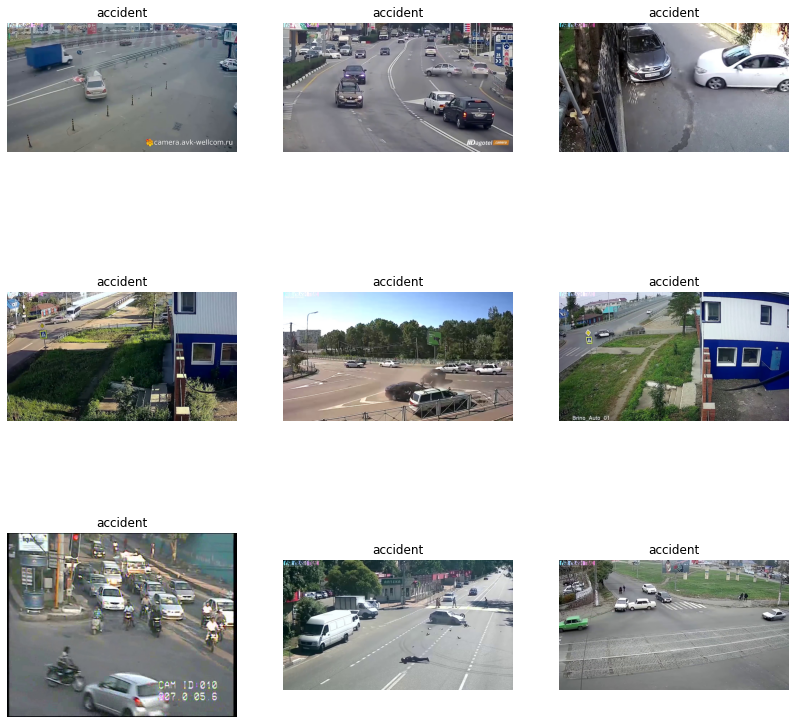

In [92]:
with open("list_images_accident.txt", "rb") as fp:
    accident = pickle.load(fp)
plt.figure(figsize=(14, 14))
ran_num = []
for i in range(0,9):
    n = random.randint(0,len(accident))
    ran_num.append(n)
for i in range(9):
    ax= plt.subplot(3, 3, i + 1)
    plt.imshow(mpimg.imread(accident[ran_num[i]]))
    plt.title("accident")
    plt.axis("off")

In [95]:
df_images_accident = pd.DataFrame()
df_images_accident["File_Name"] = name_accident
df_images_accident["Class"] = "accident"
df_images_accident

,File_Name,Class
0,acc1 (1).jpg,accident
1,acc1 (13).jpg,accident
2,acc1 (14).jpg,accident
3,acc1 (15).jpg,accident
4,acc1 (2).jpg,accident
...,...,...
364,test_39.jpg,accident
365,test_40.jpg,accident
366,test_42.jpg,accident
367,test_43.jpg,accident


In [137]:
# Read all accident images that in training set
list_images_no_accident = []
name_no_accident= []
for dirname_2, _, filenames_2 in os.walk('./data/train/Non Accident'):
    for filename in filenames_2:
        list_images_no_accident.append(os.path.join(dirname_2, filename))
        name_no_accident.append(filename)
list_images_no_accident

['./data/train/Non Accident\\5_10.jpg',
 './data/train/Non Accident\\5_11.jpg',
 './data/train/Non Accident\\5_12.jpg',
 './data/train/Non Accident\\5_13.jpg',
 './data/train/Non Accident\\5_14.jpg',
 './data/train/Non Accident\\5_15.jpg',
 './data/train/Non Accident\\5_17.jpg',
 './data/train/Non Accident\\5_24.jpg',
 './data/train/Non Accident\\5_25.jpg',
 './data/train/Non Accident\\5_27.jpg',
 './data/train/Non Accident\\5_28.jpg',
 './data/train/Non Accident\\5_29.jpg',
 './data/train/Non Accident\\5_30.jpg',
 './data/train/Non Accident\\5_5.jpg',
 './data/train/Non Accident\\5_6.jpg',
 './data/train/Non Accident\\5_7.jpg',
 './data/train/Non Accident\\5_8.jpg',
 './data/train/Non Accident\\5_9.jpg',
 './data/train/Non Accident\\test10_2.jpg',
 './data/train/Non Accident\\test10_4.jpg',
 './data/train/Non Accident\\test10_6.jpg',
 './data/train/Non Accident\\test10_7.jpg',
 './data/train/Non Accident\\test10_8.jpg',
 './data/train/Non Accident\\test11_1.jpg',
 './data/train/Non Ac

In [138]:
open_file = open("list_images_no_accident.txt", "wb")
pickle.dump(list_images_no_accident, open_file)
open_file.close()

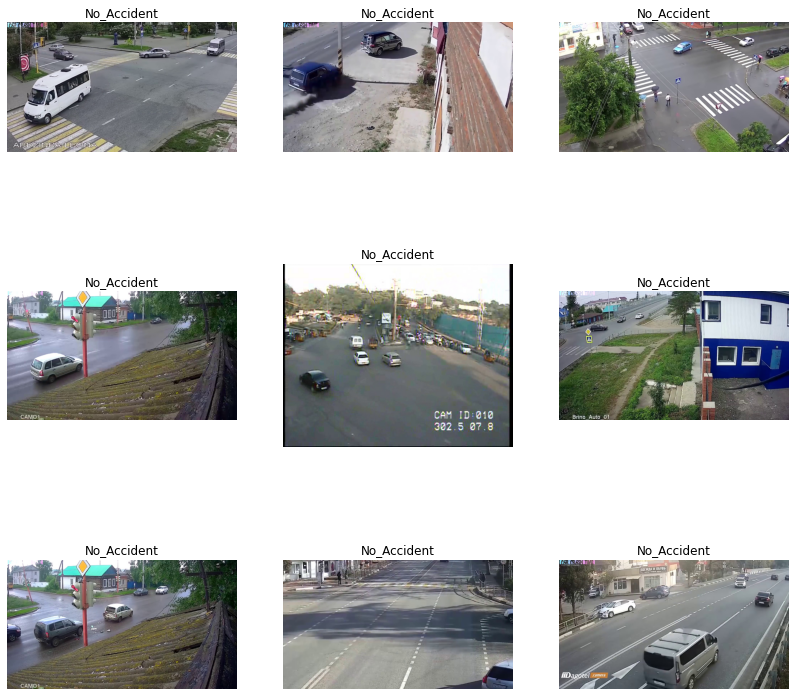

In [145]:
with open("list_images_no_accident.txt", "rb") as fp: 
    no_accident = pickle.load(fp)
plt.figure(figsize=(14, 14))
ran_num = []
for i in range(0,9):
    n = random.randint(0,len(no_accident))
    ran_num.append(n)
for i in range(9):
    ax= plt.subplot(3, 3, i + 1)
    plt.imshow(mpimg.imread(no_accident[ran_num[i]]))
    plt.title("No_Accident")
    plt.axis("off")

In [149]:
df_images_no_accident = pd.DataFrame()
df_images_no_accident["File_Name"] = name_no_accident
df_images_no_accident["Class"] = "No_Accident"
df_images_no_accident

,File_Name,Class
0,5_10.jpg,No_Accident
1,5_11.jpg,No_Accident
2,5_12.jpg,No_Accident
3,5_13.jpg,No_Accident
4,5_14.jpg,No_Accident
...,...,...
417,test_5.jpg,No_Accident
418,test_6.jpg,No_Accident
419,test_7.jpg,No_Accident
420,test_8.jpg,No_Accident


In [150]:
df_all_images = pd.concat([df_images_accident, df_images_no_accident], ignore_index=True)
df_all_images

,File_Name,Class
0,acc1 (1).jpg,accident
1,acc1 (13).jpg,accident
2,acc1 (14).jpg,accident
3,acc1 (15).jpg,accident
4,acc1 (2).jpg,accident
...,...,...
786,test_5.jpg,No_Accident
787,test_6.jpg,No_Accident
788,test_7.jpg,No_Accident
789,test_8.jpg,No_Accident


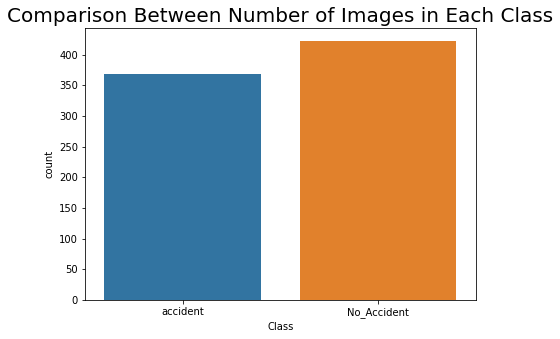

In [159]:
plt.figure(figsize=(7,5))
sns.countplot(x = "Class", data = df_all_images)
plt.title('Comparison Between Number of Images in Each Class',fontdict={'fontsize':20});

# Experiment1: Build First Neural Network Model - Convolutional Neural Networks(CNN)
### Before increase No. images in dataset

In [44]:
## Defining Cnn
MyCnn = tf.keras.models.Sequential([
  layers.BatchNormalization(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
    
  layers.Dense(len(class_names), activation= 'softmax')#Softmax is often used as the activation for the last layer of a classification network because the result could be interpreted as a probability distribution.
])
#Computes the crossentropy loss between the labels and predictions.
#Optimizer to find best weights
MyCnn.compile(optimizer='adam', 
              # Anything between 2 and `steps_per_epoch` could help here.This step enhanced our results before acc=.82,val_acc=.79
              #steps_per_execution = 50,
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [51]:
## lets train our CNN
result1 = MyCnn.fit(x_train,y_train, validation_data= validation_ds, epochs = 15)

Epoch 1/15
4/4 [==============================] - 7s 2s/step - loss: 0.4375 - accuracy: 0.8500 - val_loss: 0.6417 - val_accuracy: 0.6020
Epoch 2/15
4/4 [==============================] - 7s 2s/step - loss: 0.3710 - accuracy: 0.8600 - val_loss: 0.8296 - val_accuracy: 0.5816
Epoch 3/15
4/4 [==============================] - 7s 2s/step - loss: 0.2980 - accuracy: 0.8700 - val_loss: 0.6417 - val_accuracy: 0.7143
Epoch 4/15
4/4 [==============================] - 7s 2s/step - loss: 0.3192 - accuracy: 0.8500 - val_loss: 1.0503 - val_accuracy: 0.5918
Epoch 5/15
4/4 [==============================] - 7s 2s/step - loss: 0.2092 - accuracy: 0.9100 - val_loss: 0.7258 - val_accuracy: 0.6020
Epoch 6/15
4/4 [==============================] - 7s 2s/step - loss: 0.3155 - accuracy: 0.8200 - val_loss: 0.6192 - val_accuracy: 0.7347
Epoch 7/15
4/4 [==============================] - 7s 2s/step - loss: 0.2399 - accuracy: 0.9100 - val_loss: 0.7011 - val_accuracy: 0.6429
Epoch 8/15
4/4 [=========================

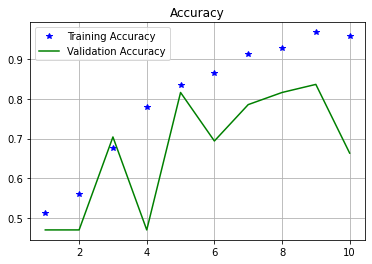

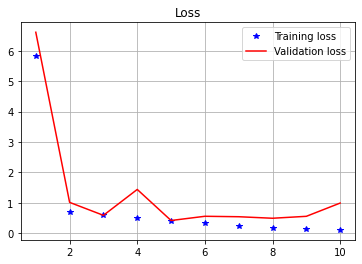

In [15]:
# Graph loss, accuracy for training and validation history
train_acc = result1.history['accuracy']
val_acc = result1.history['val_accuracy']
train_loss = result1.history['loss']
val_loss = result1.history['val_loss']
epch = range(1, len(train_acc) + 1)
plt.plot(epch, train_acc, 'b*', label='Training Accuracy')
plt.plot(epch, val_acc, 'g', label='Validation Accuracy')
plt.grid(True)
plt.title('Accuracy')
plt.legend()
plt.figure()

plt.plot(epch, train_loss, 'b*', label='Training loss')
plt.plot(epch, val_loss, 'r', label='Validation loss')
plt.grid(True)
plt.title('Loss')
plt.legend()
plt.show()


# Model plotting in Keras

Keras also provides a function to create a plot of the network neural network graph that can make more complex models easier to understand.

The plot_model() function in Keras will create a plot of your network. This function takes a few useful arguments:

* model: (required) The model that you wish to plot.
* to_file: (required) The name of the file to which to save the plot.
* show_shapes: (optional, defaults to False) Whether or not to show the output shapes of each layer.
* show_layer_names: (optional, defaults to True) Whether or not to show the name for each layer.

Below is the updated example that plots the MyCnn model.

In [172]:
#Model Architecture
from keras.utils.vis_utils import plot_model
plot_model(MyCnn, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [52]:
results_test = MyCnn.evaluate(testing_ds)
print('Test Loss:', results_test[0])
print('Test Accuracy:', results_test[1])

1/1 [==============================] - 1s 1s/step - loss: 0.6836 - accuracy: 0.7300
Test Loss: 0.6835789680480957
Test Accuracy: 0.7300000190734863


In [53]:
MyCnn.save('CNNmodels/cnn_v1.h5')

# Using the model
* Loading the model
* Evaluating the model
* Getting predictions

In [54]:
model = keras.models.load_model('CNNmodels/cnn_v1.h5')

In [55]:
# Get predictions for confusion matrix
# Need to round predictions to whole numbers
predictions = MyCnn.predict(testing_ds)
predictions = np.round(predictions)

In [56]:
# Function for plotting easier to read confusion matrix
def show_cf(y_true, y_pred, class_names=None, model_name=None):
    class_names=2
    cf = confusion_matrix(y_true, y_pred)
    plt.imshow(cf, cmap=plt.cm.Blues)
    
    if model_name:
        plt.title("Confusion Matrix: {}".format(model_name))
    else:
        plt.title("Confusion Matrix")
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    
    class_names = set(y_true)
    tick_marks = np.arange(class_names)
    if class_names:
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
    
    thresh = cf.max() / 2.
    
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, cf[i, j], horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')

    plt.colorbar()

In [57]:
labels_batch

<tf.Tensor: shape=(98,), dtype=int32, numpy=
array([1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0])>

In [34]:
show_cf(labels_batch,predictions)

ValueError: Classification metrics can't handle a mix of binary and multilabel-indicator targets

# Experiment2: Data Augmentation 

In [ ]:
?ImageDataGenerator

In [202]:
datagen = ImageDataGenerator(
    rotation_range = 40, 
    width_shift_range = 0.1,
    height_shift_range = 0.1, 
    brightness_range = (0.5, 1),
    shear_range=0.2,
    zoom_range = 0.2,
    horizontal_flip = True, 
    fill_mode='nearest')

Found 1 validated image filenames belonging to 1 classes.


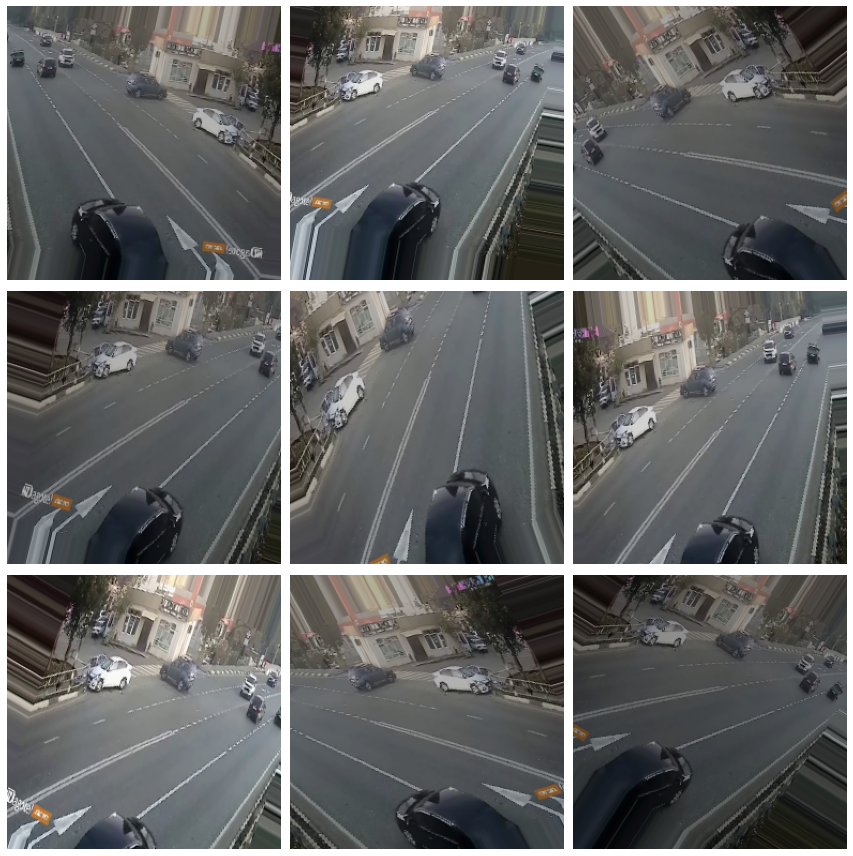

In [203]:
sample_df = df_images_accident.sample(1)

sample_generator = datagen.flow_from_dataframe(
    dataframe = sample_df,
    directory = './data/train/Accident',
    x_col = "File_Name",
    y_col = "Class")

plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    for X, y in sample_generator:
        plt.imshow(X[0]/255)
        plt.axis("off")
        break
plt.tight_layout()
plt.show()

In [204]:
Sample_list_images_no_accident = random.sample(list_images_no_accident, 422)
Sample_list_images_accident = random.sample(list_images_accident, 369)

In [ ]:
for path in Sample_list_images_accident:
    img = load_img(path)
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)

    i = 0
    for batch in datagen.flow(x, batch_size=1,save_to_dir='./data/train/Accident', save_prefix='accident', save_format='jpg'):
        i += 1
        if i > 5:
            break
            
for path in Sample_list_images_no_accident:
    img = load_img(path)
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)

    i = 0
    for batch in datagen.flow(x, batch_size=1,save_to_dir='./data/train/Non Accident', save_prefix='non accident', save_format='jpg'):
        i += 1
        if i > 5:
            break

In [ ]:
list_images_accident_Aug = []
name_accident_Aug= []
for dirname, _, filenames in os.walk('./data/train/Accident'):
    for filename in filenames:
        list_images_accident_Aug.append(os.path.join(dirname, filename))
        name_accident_Aug.append(filename)

list_images_accident_Aug = pd.DataFrame()
list_images_accident_Aug["File_Name"] = name_accident_Aug
list_images_accident_Aug["Class"] = "Accident"
list_images_accident_Aug

In [ ]:
list_images_no_accident_Aug = []
name_no_accident_Aug= []
for dirname, _, filenames in os.walk('./data/train/Non Accident'):
    for filename in filenames:
        list_images_no_accident_Aug.append(os.path.join(dirname, filename))
        name_no_accident_Aug.append(filename)

list_images_no_accident_Aug = pd.DataFrame()
list_images_no_accident_Aug["File_Name"] = name_no_accident_Aug
list_images_no_accident_Aug["Class"] = "Non Accident"
list_images_no_accident_Aug

In [ ]:
df_all_images_Aug = pd.concat([list_images_accident_Aug, list_images_no_accident_Aug], ignore_index=True)
df_all_images_Aug

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x = "Class", data = df_all_images_Aug,color='r')
plt.title('Comparison Between Number of Images in Each Class',fontdict={'fontsize':20});

In [61]:
## Generated Validation Augmen
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator =  val_datagen.flow_from_directory(
    './data/val',
    seed=42,
    target_size= (img_height, img_width),
    batch_size=batch_size, class_mode='binary')

Found 98 images belonging to 2 classes.


In [63]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator =  test_datagen.flow_from_directory(
    './data/test',
    seed=42,
    target_size= (img_height, img_width),
    batch_size=batch_size, class_mode='binary')

Found 100 images belonging to 2 classes.


In [178]:
# Create the data sets
train_images, train_labels = next(train_generator)
val_images, val_labels = next(val_generator)
test_images, test_labels = next(test_generator)

In [179]:
# Checking the shapes of the datasets
m_train = train_images.shape[0]
num_px = train_images.shape[1]
m_val = val_images.shape[0]
m_test = test_images.shape[0]

print ("Number of training samples: " + str(m_train))
print ("Number of validation samples: " + str(m_val))
print ("Number of testing samples: " + str(m_test))
print ("train_images shape: " + str(train_images.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("val_images shape: " + str(val_images.shape))
print ("val_labels shape: " + str(val_labels.shape))
print ("test_images shape: " + str(test_images.shape))
print ("test_labels shape: " + str(test_labels.shape))

Number of training samples: 91
Number of validation samples: 98
Number of testing samples: 100
train_images shape: (91, 250, 250, 3)
train_labels shape: (91,)
val_images shape: (98, 250, 250, 3)
val_labels shape: (98,)
test_images shape: (100, 250, 250, 3)
test_labels shape: (100,)


# Model fitting (augmented) and Accuracy/Loss Evaluation

In [ ]:
result2 = MyCnn.fit(train_generator, validation_data= val_generator,epochs = 10)

In [ ]:
result2_test = MyCnn.evaluate(test_generator)
print('Test Loss:', results_test[0])
print('Test Accuracy:', results_test[1])

In [ ]:
# Get predictions for confusion matrix
# Need to round predictions to whole numbers
predictions1 = MyCnn.predict(test_generator)
predictions1 = np.round(predictions1)

In [ ]:
# Function for plotting easier to read confusion matrix
def show_cf(y_true, y_pred, class_names=None, model_name=None):
    class_names=2
    cf = confusion_matrix(y_true, y_pred)
    plt.imshow(cf, cmap=plt.cm.Blues)
    
    if model_name:
        plt.title("Confusion Matrix: {}".format(model_name))
    else:
        plt.title("Confusion Matrix")
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    
    class_names = set(y_true)
    tick_marks = np.arange(class_names)
    if class_names:
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
    
    thresh = cf.max() / 2.
    
    for i, j in itertools.product(range(cf.shape[0]), range(cf.shape[1])):
        plt.text(j, i, cf[i, j], horizontalalignment='center', color='white' if cf[i, j] > thresh else 'black')

    plt.colorbar()

In [ ]:
# show_cf(test_labels,predictions1)

In [ ]:
MyCnn.save('CnnModelsAug/cnn_v1.h5')

In [ ]:
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in testing_ds.take(1):
    predictions = MyCnn.predict(images)
    predlabel = []
    prdlbl = []
    
    for n in predictions:
        predlabel.append(class_names[np.argmax(n)])
        prdlbl.append(np.argmax(n))
    
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Predict : '+ predlabel[i]+'   Real :'+class_names[labels[i]] )
        plt.axis('off')
        plt.grid(True)
